In [6]:
from google.colab import files

In [7]:
files.upload()

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set (1).csv


{'Maternal Health Risk Data Set.csv': b'\xef\xbb\xbfAge,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel\r\n25,130,80,15,98,86,high risk\r\n35,140,90,13,98,70,high risk\r\n29,90,70,8,100,80,high risk\r\n30,140,85,7,98,70,high risk\r\n35,120,60,6.1,98,76,low risk\r\n23,140,80,7.01,98,70,high risk\r\n23,130,70,7.01,98,78,mid risk\r\n35,85,60,11,102,86,high risk\r\n32,120,90,6.9,98,70,mid risk\r\n42,130,80,18,98,70,high risk\r\n23,90,60,7.01,98,76,low risk\r\n19,120,80,7,98,70,mid risk\r\n25,110,89,7.01,98,77,low risk\r\n20,120,75,7.01,100,70,mid risk\r\n48,120,80,11,98,88,mid risk\r\n15,120,80,7.01,98,70,low risk\r\n50,140,90,15,98,90,high risk\r\n25,140,100,7.01,98,80,high risk\r\n30,120,80,6.9,101,76,mid risk\r\n10,70,50,6.9,98,70,low risk\r\n40,140,100,18,98,90,high risk\r\n50,140,80,6.7,98,70,mid risk\r\n21,90,65,7.5,98,76,low risk\r\n18,90,60,7.5,98,70,low risk\r\n21,120,80,7.5,98,76,low risk\r\n16,100,70,7.2,98,80,low risk\r\n19,120,75,7.2,98,66,low risk\r\n22,100,65,7.2,98,7

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
df=pd.read_csv('Maternal Health Risk Data Set.csv')

In [10]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


Text(0.5, 1.0, 'Corelation Ship Matrix')

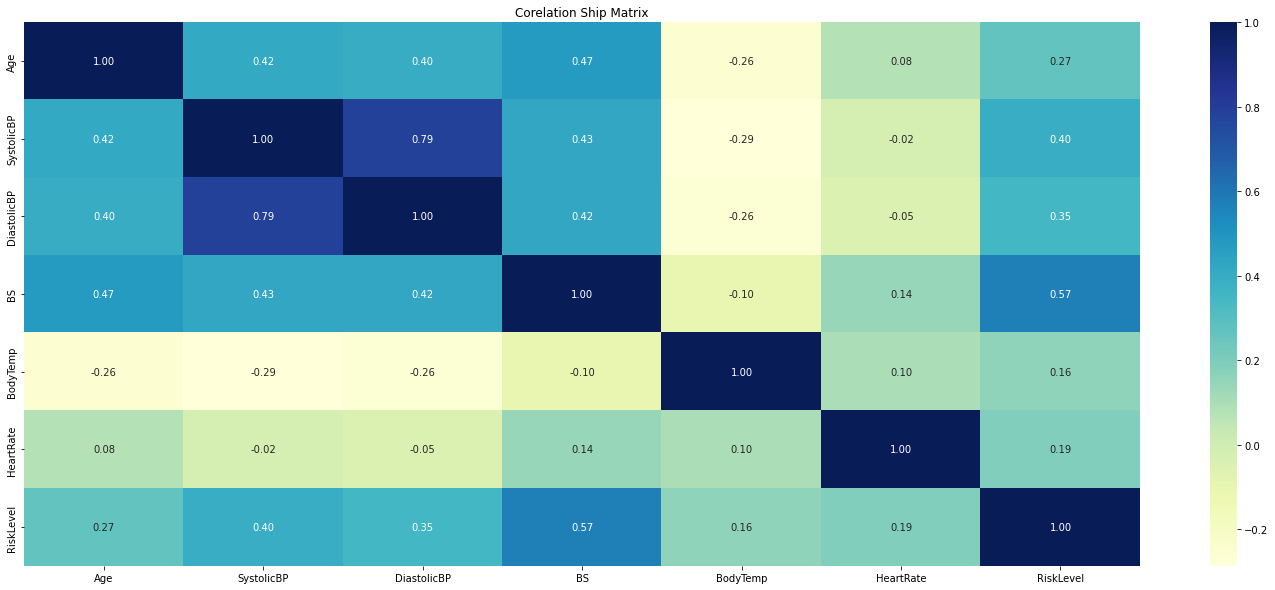

In [12]:
df['RiskLevel']=df['RiskLevel'].replace(['low risk'],0)
df['RiskLevel']=df['RiskLevel'].replace(['mid risk'],1)
df['RiskLevel']=df['RiskLevel'].replace(['high risk'],2)
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(25,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap="YlGnBu");
plt.title("Corelation Ship Matrix")

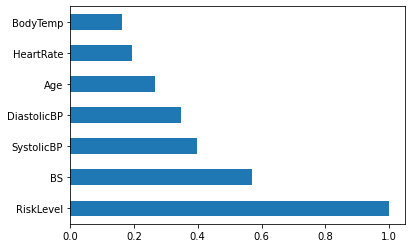

In [68]:
df[df.columns[0:]].corr()['RiskLevel'][:].sort_values(ascending=False).plot(kind='barh')

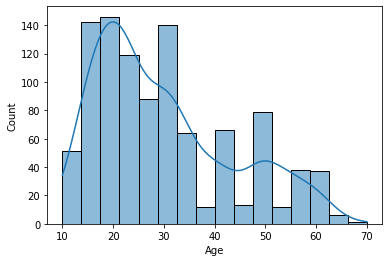

In [14]:
sns.histplot(df['Age'],kde=True)

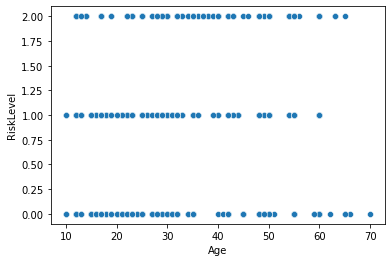

In [15]:
sns.scatterplot(x='Age',y='RiskLevel',data=df)

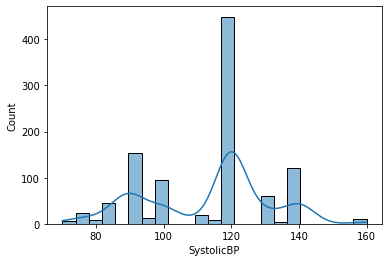

In [16]:
sns.histplot(df['SystolicBP'],kde=True)

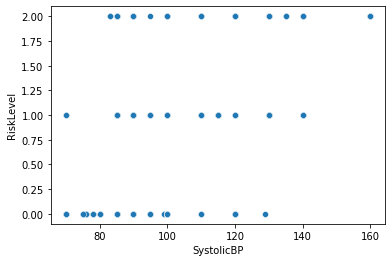

In [17]:
sns.scatterplot(x='SystolicBP',y='RiskLevel',data=df)

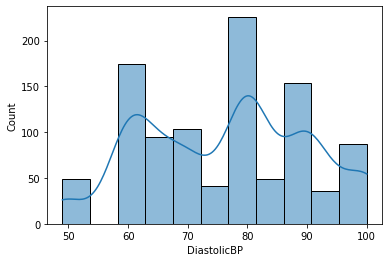

In [18]:
sns.histplot(df['DiastolicBP'],kde=True)

In [19]:
df[(df['DiastolicBP']==60)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
4,35,120,60,6.10,98.0,76,0
7,35,85,60,11.00,102.0,86,2
10,23,90,60,7.01,98.0,76,0
23,18,90,60,7.50,98.0,70,0
29,28,90,60,7.20,98.0,82,0
...,...,...,...,...,...,...,...
996,12,90,60,8.00,102.0,66,2
1000,12,90,60,11.00,102.0,60,2
1006,17,85,60,6.30,102.0,86,2
1009,22,120,60,15.00,98.0,80,2


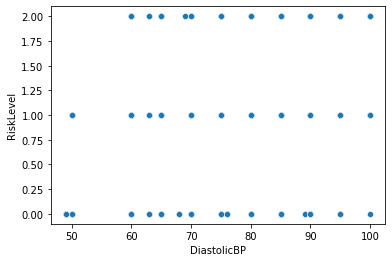

In [20]:
sns.scatterplot(x='DiastolicBP',y='RiskLevel',data=df)

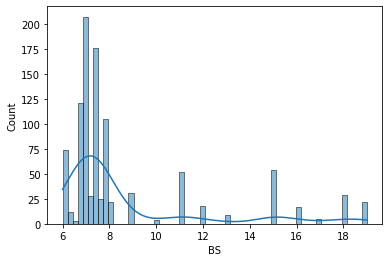

In [21]:
sns.histplot(df['BS'],kde=True)

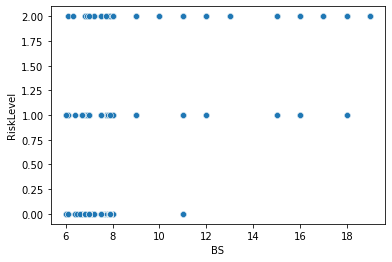

In [22]:
sns.scatterplot(x='BS',y='RiskLevel',data=df)

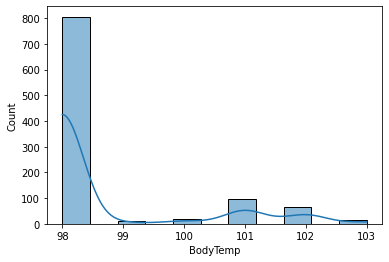

In [23]:
sns.histplot(df['BodyTemp'],kde=True)

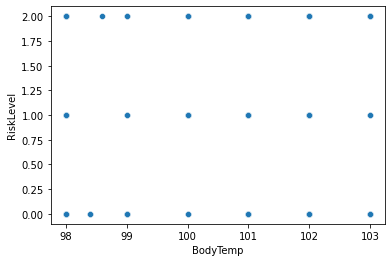

In [24]:
sns.scatterplot(x='BodyTemp',y='RiskLevel',data=df)

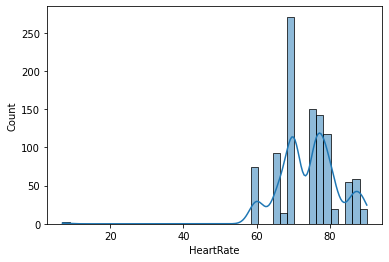

In [25]:
sns.histplot(df['HeartRate'],kde=True)

In [26]:
x=df.drop(['RiskLevel'],axis=1)
y=df['RiskLevel']

In [27]:
Feature=SelectKBest(k='all')

In [28]:
Feature.fit(x,y)

SelectKBest(k='all')

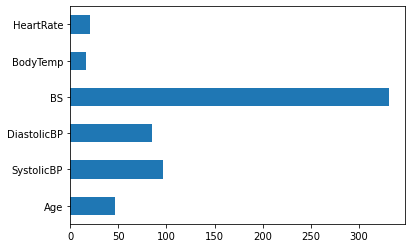

In [29]:
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [30]:
top_columns=x.drop(['BodyTemp'],axis=1)

In [31]:
top_columns

,Age,SystolicBP,DiastolicBP,BS,HeartRate
0,25,130,80,15.0,86
1,35,140,90,13.0,70
2,29,90,70,8.0,80
3,30,140,85,7.0,70
4,35,120,60,6.1,76
...,...,...,...,...,...
1009,22,120,60,15.0,80
1010,55,120,90,18.0,60
1011,35,85,60,19.0,86
1012,43,120,90,18.0,70


In [32]:
x=top_columns

In [33]:
Forest=RandomForestClassifier(n_estimators=20)
KNN=KNeighborsClassifier(n_neighbors=115)
Support=SVC(gamma='auto')
LR=LogisticRegression()
Tree=DecisionTreeClassifier()
LGBM=LGBMClassifier()
XGB=XGBClassifier()
GNB=GaussianNB()
BNB=BernoulliNB()
LDA=LinearDiscriminantAnalysis()
Adaboost=AdaBoostClassifier(n_estimators=27)

In [34]:
Algo=[Forest,KNN,Support,LR,Tree,LGBM,XGB,GNB,BNB,LDA,Adaboost]
Algorithms=["Forest","KNN","Support","LR","Tree","LGBM","XGB","GNB","BNB","LDA","Adaboost"]

In [35]:
Scores=[]
Averages=[]
for i in Algo:
  cv_score=cross_val_score(i,x,y,cv=10)
  Scores.append(cv_score)
  Averages.append(cv_score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [36]:
Scores=pd.DataFrame(Scores)
Averages=pd.DataFrame(Averages,columns=['Average'])
Algorithms=pd.DataFrame(Algorithms,columns=['Algorithms'])

In [37]:
Table=pd.concat([Algorithms,Scores],axis=1)
Table=pd.concat([Table,Averages],axis=1)
Table

,Algorithms,0,1,2,3,4,5,6,7,8,9,Average
0,Forest,0.960784,0.980392,0.833333,0.656863,0.693069,0.920792,0.851485,0.762376,0.782178,0.851485,0.829276
1,KNN,0.598039,0.607843,0.549020,0.529412,0.514851,0.653465,0.564356,0.534653,0.584158,0.504950,0.564075
2,Support,0.862745,0.862745,0.764706,0.735294,0.633663,0.801980,0.792079,0.693069,0.693069,0.801980,0.764133
3,LR,0.627451,0.637255,0.558824,0.598039,0.524752,0.504950,0.544554,0.425743,0.524752,0.623762,0.557008
4,Tree,0.970588,0.950980,0.852941,0.607843,0.574257,0.930693,0.821782,0.752475,0.792079,0.851485,0.810513
5,LGBM,0.950980,0.950980,0.794118,0.637255,0.623762,0.910891,0.871287,0.772277,0.732673,0.871287,0.811551
6,XGB,0.833333,0.892157,0.656863,0.588235,0.534653,0.851485,0.861386,0.623762,0.594059,0.871287,0.730722
7,GNB,0.549020,0.627451,0.558824,0.588235,0.623762,0.643564,0.613861,0.564356,0.584158,0.643564,0.599680
8,BNB,0.392157,0.392157,0.401961,0.401961,0.405941,0.405941,0.405941,0.405941,0.396040,0.396040,0.400408
9,LDA,0.598039,0.637255,0.549020,0.607843,0.554455,0.603960,0.643564,0.435644,0.544554,0.633663,0.580800


In [38]:
average=list(Table['Average'])

In [42]:
Table

,Algorithms,0,1,2,3,4,5,6,7,8,9,Average
0,Forest,0.960784,0.980392,0.833333,0.656863,0.693069,0.920792,0.851485,0.762376,0.782178,0.851485,0.829276
1,KNN,0.598039,0.607843,0.549020,0.529412,0.514851,0.653465,0.564356,0.534653,0.584158,0.504950,0.564075
2,Support,0.862745,0.862745,0.764706,0.735294,0.633663,0.801980,0.792079,0.693069,0.693069,0.801980,0.764133
3,LR,0.627451,0.637255,0.558824,0.598039,0.524752,0.504950,0.544554,0.425743,0.524752,0.623762,0.557008
4,Tree,0.970588,0.950980,0.852941,0.607843,0.574257,0.930693,0.821782,0.752475,0.792079,0.851485,0.810513
5,LGBM,0.950980,0.950980,0.794118,0.637255,0.623762,0.910891,0.871287,0.772277,0.732673,0.871287,0.811551
6,XGB,0.833333,0.892157,0.656863,0.588235,0.534653,0.851485,0.861386,0.623762,0.594059,0.871287,0.730722
7,GNB,0.549020,0.627451,0.558824,0.588235,0.623762,0.643564,0.613861,0.564356,0.584158,0.643564,0.599680
8,BNB,0.392157,0.392157,0.401961,0.401961,0.405941,0.405941,0.405941,0.405941,0.396040,0.396040,0.400408
9,LDA,0.598039,0.637255,0.549020,0.607843,0.554455,0.603960,0.643564,0.435644,0.544554,0.633663,0.580800


<Figure size 1080x576 with 0 Axes>

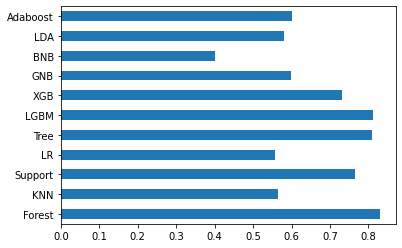

<Figure size 1080x576 with 0 Axes>

In [46]:
pd.Series(list(Table['Average']),index=list(Table['Algorithms'])).plot(kind='barh')
plt.figure(figsize=(15,8))

In [47]:
algo_best=Algo[average.index(max(average))]

In [48]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=1)

In [49]:
algo_best.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20)

In [50]:
algo_best.score(x,y)

0.9102564102564102

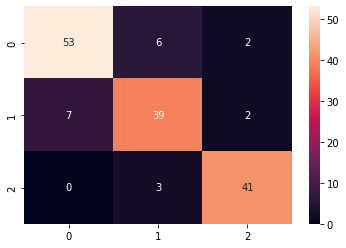

In [51]:
pred=Forest.predict(xtest)
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [52]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        61
           1       0.81      0.81      0.81        48
           2       0.91      0.93      0.92        44

    accuracy                           0.87       153
   macro avg       0.87      0.87      0.87       153
weighted avg       0.87      0.87      0.87       153



Text(0.5, 1.0, 'For Random Forest Classifier')

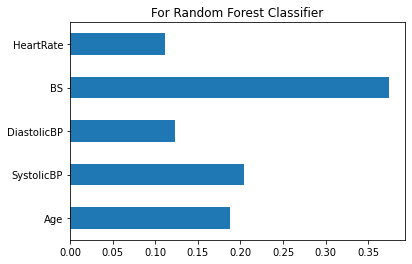

In [53]:
Forest.fit(x,y)
pd.Series(Forest.feature_importances_,index=x.columns).plot(kind='barh')
plt.title("For Random Forest Classifier")

Text(0.5, 1.0, 'For LGBM Classifier')

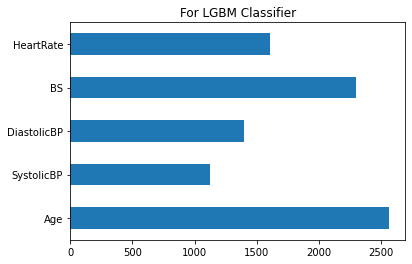

In [54]:
LGBM.fit(x,y)
pd.Series(LGBM.feature_importances_,index=x.columns).plot(kind='barh')
plt.title("For LGBM Classifier")

Text(0.5, 1.0, 'For XGBOOST Classifier')

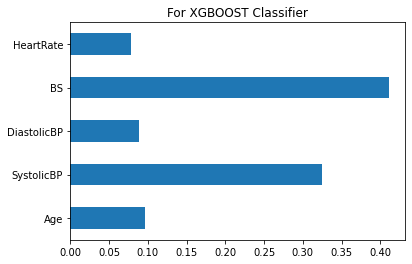

In [55]:
XGB.fit(x,y)
pd.Series(XGB.feature_importances_,index=x.columns).plot(kind='barh')
plt.title("For XGBOOST Classifier")

In [56]:
Algorithms=[("Forest",Forest),("KNN",KNN),("Support",Support),("LR",LR),("Tree",Tree),("LGBM",LGBM),("XGB",XGB),("GNB",GNB),("BNB",BNB),("LDA",LDA),("Adaboost",Adaboost)]
Stacking=StackingClassifier(Algorithms,final_estimator=Support)

In [57]:
Stacking.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(estimators=[('Forest',
                                RandomForestClassifier(n_estimators=20)),
                               ('KNN', KNeighborsClassifier(n_neighbors=115)),
                               ('Support', SVC(gamma='auto')),
                               ('LR', LogisticRegression()),
                               ('Tree', DecisionTreeClassifier()),
                               ('LGBM', LGBMClassifier()),
                               ('XGB',
                                XGBClassifier(objective='multi:softprob')),
                               ('GNB', GaussianNB()), ('BNB', BernoulliNB()),
                               ('LDA', LinearDiscriminantAnalysis()),
                               ('Adaboost',
                                AdaBoostClassifier(n_estimators=27))],
                   final_estimator=SVC(gamma='auto'))

In [58]:
Stacking.score(x,y)

0.9142011834319527

In [59]:
pred=Stacking.predict(xtest)

In [60]:
xtest.shape

(153, 5)

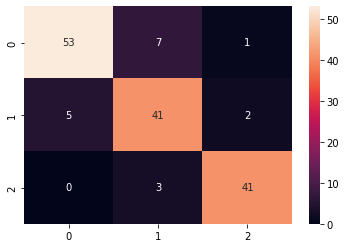

In [61]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [62]:
pd.Series(ytest).value_counts()

0    61
1    48
2    44
Name: RiskLevel, dtype: int64

In [63]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        61
           1       0.80      0.85      0.83        48
           2       0.93      0.93      0.93        44

    accuracy                           0.88       153
   macro avg       0.88      0.88      0.88       153
weighted avg       0.88      0.88      0.88       153



In [64]:
Column_names=["Age","SystolicBP","DiastolicBP","BS","HeartRate"]

In [65]:
xtest

,Age,SystolicBP,DiastolicBP,BS,HeartRate
919,19,90,70,7.5,80
619,29,130,70,7.5,78
293,23,120,80,7.7,70
507,18,120,80,7.9,76
974,33,120,75,10.0,70
...,...,...,...,...,...
573,42,120,80,7.5,70
482,50,140,95,17.0,60
823,29,130,70,7.5,78
473,32,140,100,7.9,78


In [85]:
Prediction=pd.DataFrame(list(ytest),columns=['Actual'])
Prediction=pd.concat([pd.DataFrame(list(pred),columns=['Predicted']),Prediction],axis=1)
Prediction

,Predicted,Actual
0,0,0
1,1,1
2,0,0
3,1,1
4,2,2
...,...,...
148,0,0
149,2,2
150,1,1
151,2,2


In [66]:
for_pred=[]

In [ ]:
for i in Column_names:
  item=input(f"{i}:")
  for_pred.append(item)

In [ ]:
k=Stacking.predict([for_pred])
if(k==2):
  print("High Risk")
elif(k==1):
  print('Mid Risk')
else:
  print("Low Risk")

Low Risk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

In [86]:
Voting=VotingClassifier(estimators=[('dt',Forest),('lr',LGBM),('co',Tree),('knn',KNN)],voting='hard')

In [87]:
Voting.fit(xtrain,ytrain)

VotingClassifier(estimators=[('dt', RandomForestClassifier(n_estimators=20)),
                             ('lr', LGBMClassifier()),
                             ('co', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier(n_neighbors=115))])

In [88]:
Voting.score(xtest,ytest)

0.869281045751634